<h1>Red Wine Quality Dataset</h1>
<h2>Context</h2>
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Link to dataset : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

<h1>What to do</h1>
Given the data of Red Wine, we will find the equation / correlation between the variable of the Red Wine such as alcohol, density, etc. to the target variable (quality) using the baseline Machine Learning Model (simple one)

# Preparation and Importing Library

In [1]:
!pip install eli5
!pip install pydot
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 10.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5af10ebbab017d057d0efdcb21fd3d740448f4b1aad0d628235bab2cc36d70c4
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

We'll be using simple Decision Tree algorithm from sklearn to see how much can we get by just using those tools.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (17, 11)
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

import eli5
from eli5.sklearn import PermutationImportance
import pydot
import os

import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [4]:
train = pd.read_csv('/content/drive/MyDrive/ML Project /Red Wine Quality/Data/Red Wine Quality - Train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML Project /Red Wine Quality/Data/Red Wine Quality - Test.csv')

In [5]:
display(train, test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,5
1,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5
2,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
3,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5
1195,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
1196,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
1197,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
2,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
3,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
4,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
395,9.3,0.390,0.40,2.60,0.073,10.0,26.0,0.99840,3.34,0.75,10.2,6
396,11.9,0.580,0.66,2.50,0.072,6.0,37.0,0.99920,3.05,0.56,10.0,5
397,7.3,0.365,0.49,2.50,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
398,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7


# Taking Variable

ytest variable is popped to be used for verification later

In [6]:
ytest = test.pop('quality')
ytest

0      6
1      5
2      7
3      6
4      5
      ..
395    6
396    5
397    5
398    7
399    5
Name: quality, Length: 400, dtype: int64

In [7]:
test.shape

(400, 11)

In [8]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,5
1,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5
2,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
3,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5
1195,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
1196,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
1197,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


In [9]:
train.shape

(1199, 12)

# Exploratory Data Analysis

## NA values checking

In [10]:
print('='*20, 'TRAIN DF NaN', '='*20)
print(train.isna().sum())
print('='*20, 'TEST DF NaN', '='*20)
print(test.isna().sum())

==================== TRAIN DF NaN ====================
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
==================== TEST DF NaN ====================
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


## Train data type


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   float64
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.5 KB


## Statistic

In [12]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.338032,0.530388,0.271034,2.557882,0.087227,16.132611,47.371977,0.996757,3.308874,0.658757,10.405922,5.642202
std,1.736475,0.183484,0.194574,1.477834,0.048135,10.616294,33.998178,0.001881,0.154309,0.176884,1.065632,0.815902
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.100000,6.000000
75%,9.250000,0.640000,0.420000,2.600000,0.090000,22.000000,63.500000,0.997845,3.400000,0.730000,11.000000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Popping target variable

In [13]:
y = train.pop('quality')
y

0       5
1       5
2       5
3       6
4       5
       ..
1194    5
1195    5
1196    6
1197    6
1198    5
Name: quality, Length: 1199, dtype: int64

## Plotting the target variable

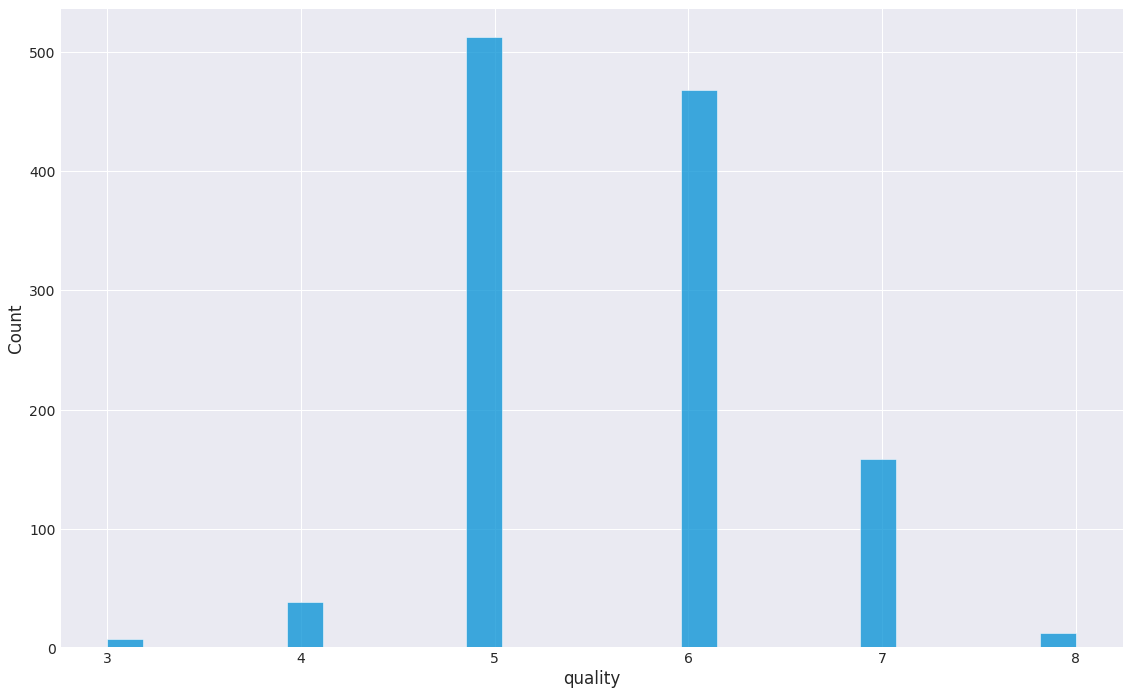

In [14]:
sns.histplot(y)

We see that most of the quality of the wines are on 5 and 6, so if we consider this as a Classification Problem, this is an imbalanced learning. <br>
Solution : Using SMOTE to balance the classification, or using weighted class imbalance in Tree Algorithm

In [15]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## Visualizing the distribution of dependent variables

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

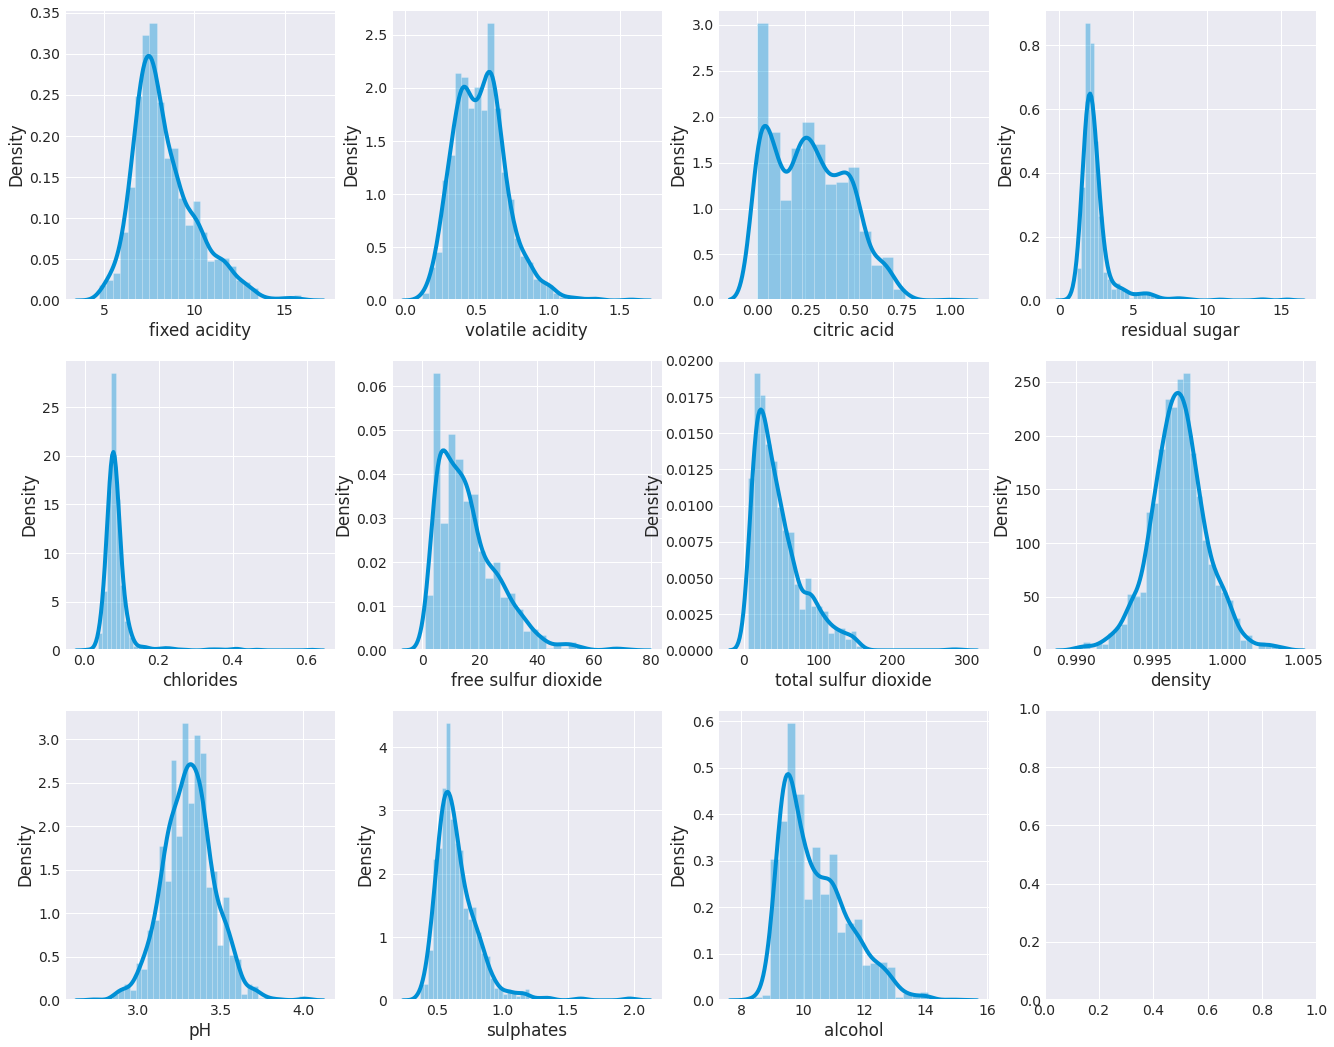

In [16]:
f, axes = plt.subplots(3, 4, figsize = (20, 17))
for col, ax in zip(train.columns, axes.ravel()) :
    # plt.subplot(3,4,ax)
    _ = sns.distplot(train[col], ax=ax)
    ax.set_title('')
    ax.set_xlabel(col)
plt.show()

We see most of the data are skewed distributed. <br>
Solution : Taking a log from the feature or scaling it

## Correlation
We'll find correlation between each independent variables and independent variables to dependent variable

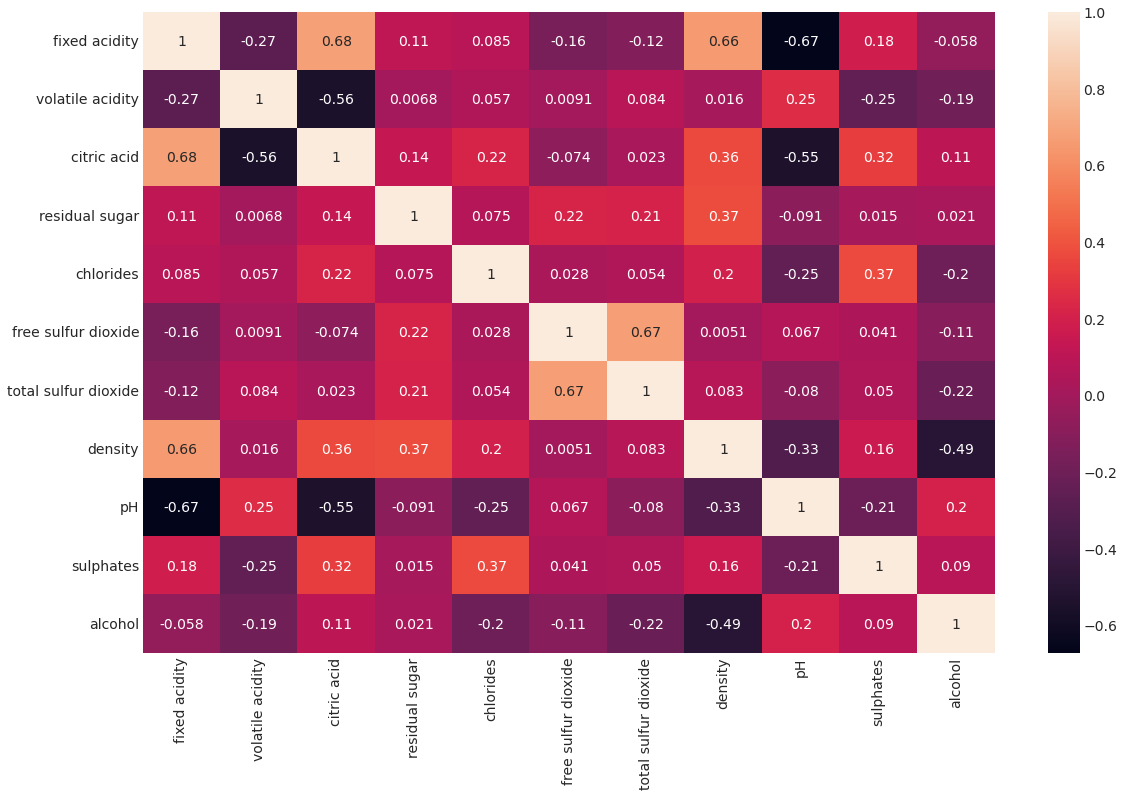

In [17]:
# Independent variables
_ = sns.heatmap(train.corr(), annot = True)

This is the correlation of the dependent variables. We see that there are correlative dependent variables which can lead to multicorrelation and bring bad to the prediction. <br>
Solution : Using PCA or using the decision tree algorithm.

alcohol                 0.462611
sulphates               0.247010
citric acid             0.242519
fixed acidity           0.134515
residual sugar          0.012275
pH                     -0.072022
free sulfur dioxide    -0.081731
chlorides              -0.123183
density                -0.166300
total sulfur dioxide   -0.189712
volatile acidity       -0.411626
dtype: float64


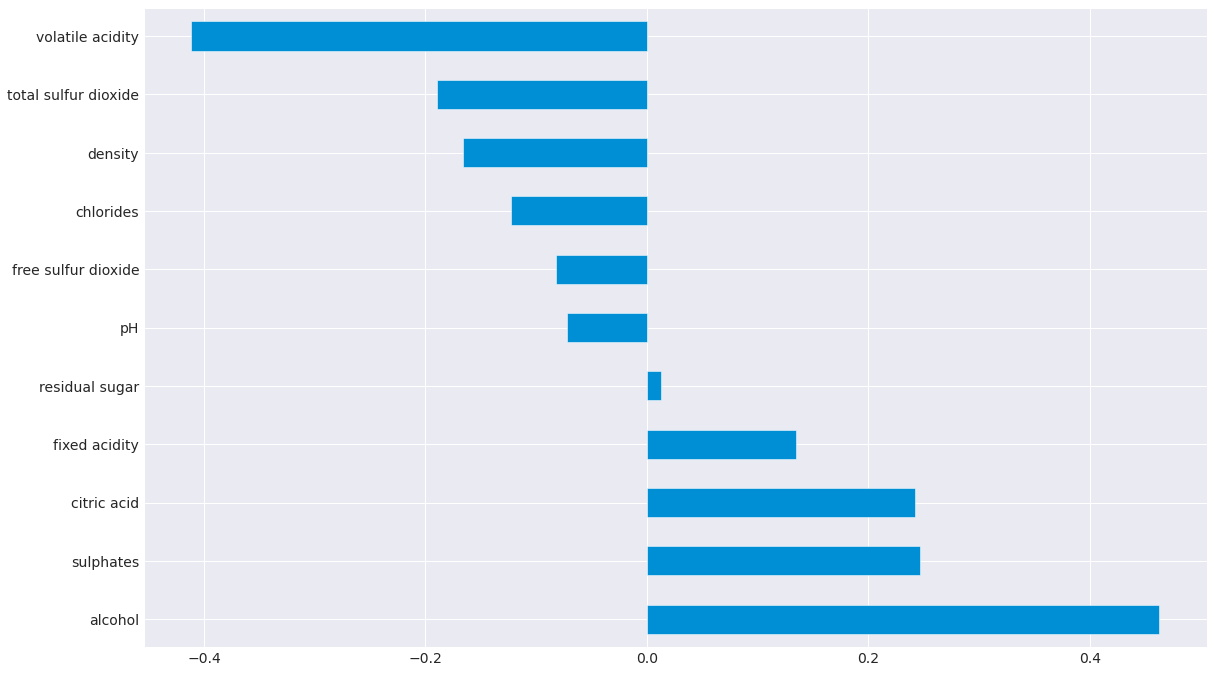

In [18]:
# Independent variables to dependent variable
print(train.corrwith(y).sort_values(ascending = False))
_ = train.corrwith(y).sort_values(ascending = False).plot.barh()

alcohol                 0.462611
volatile acidity        0.411626
sulphates               0.247010
citric acid             0.242519
total sulfur dioxide    0.189712
density                 0.166300
fixed acidity           0.134515
chlorides               0.123183
free sulfur dioxide     0.081731
pH                      0.072022
residual sugar          0.012275
dtype: float64


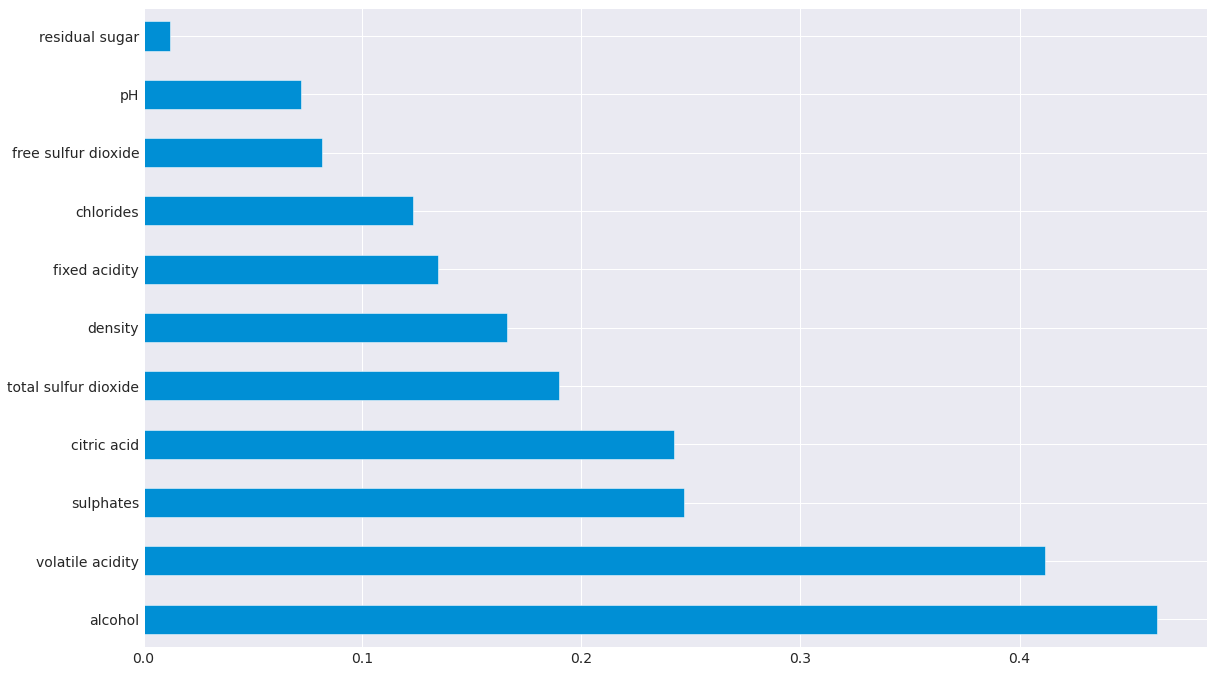

In [19]:
print(train.corrwith(y).abs().sort_values(ascending = False))
train.corrwith(y).abs().sort_values(ascending = False).plot.barh()

alcohol                 0.169508
volatile acidity        0.132157
sulphates               0.121469
citric acid             0.093815
total sulfur dioxide    0.086702
density                 0.066426
fixed acidity           0.038815
free sulfur dioxide     0.020430
pH                      0.018621
chlorides               0.015081
residual sugar          0.000000
dtype: float64


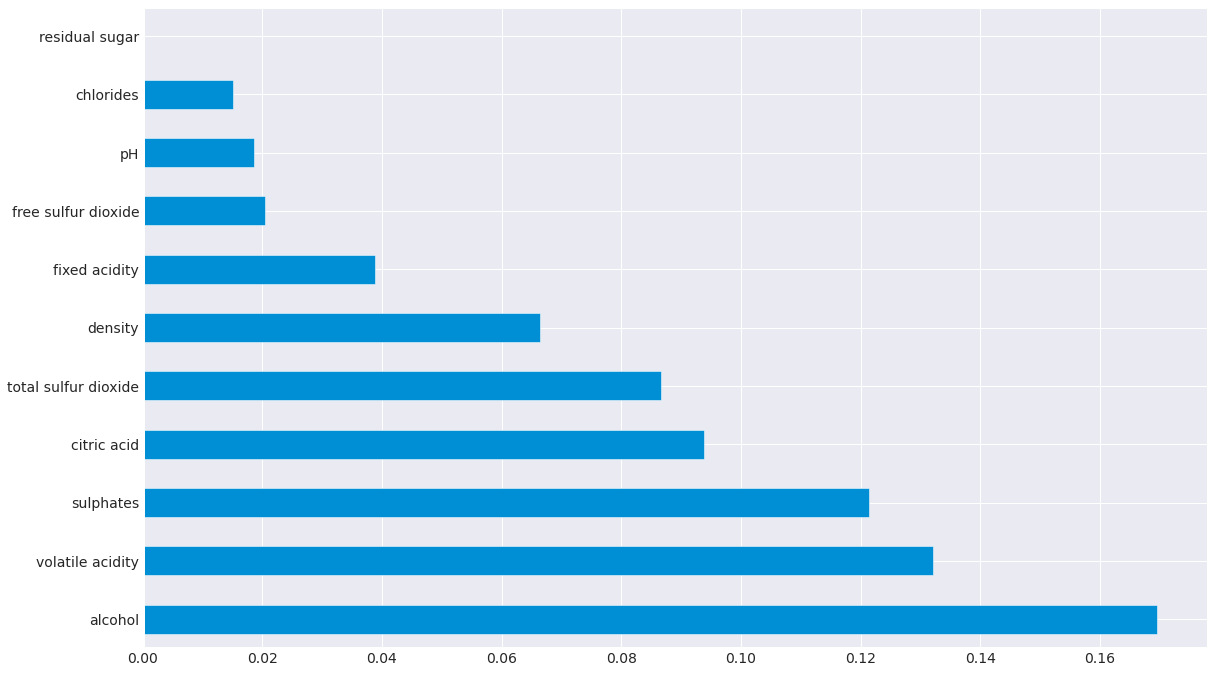

In [20]:
# There's also another way to find a correlation between the independent variables and dependent variable using "Mutual Info"
mi_regress = mutual_info_regression(train, y, random_state = 0)
mi_regress = pd.Series(
    mi_regress,
    index = train.columns
).sort_values(ascending = False)
print(mi_regress)
mi_regress.plot.barh()

alcohol                 0.169089
volatile acidity        0.146767
sulphates               0.100429
citric acid             0.088276
total sulfur dioxide    0.080701
density                 0.066164
fixed acidity           0.060876
residual sugar          0.034742
free sulfur dioxide     0.032757
pH                      0.020538
chlorides               0.001960
dtype: float64


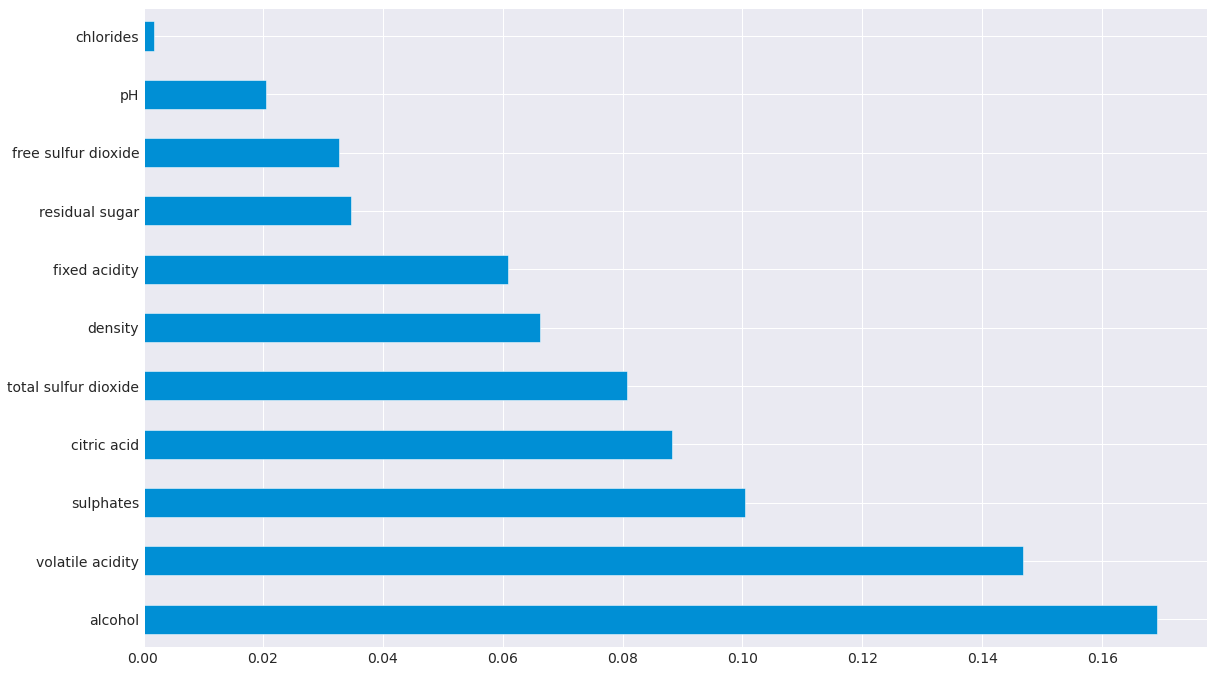

In [21]:
# We also try using the mutual_info_classif, cause the problem could be considered by classification and regression
mi_classif = mutual_info_classif(train, y, random_state = 0)
mi_classif = pd.Series(
    mi_classif,
    index = train.columns
).sort_values(ascending = False)
print(mi_classif)
mi_classif.plot.barh()

We see that from 3 means of finding correlation betwaeen independent variables and dependent, they all say the same in orders. <br>
So, let's start making the model

# Modelling

## Splitting the data
We'll first split the data into two part, train and validation data.

In [22]:
xtrain, xval, ytrain, yval = train_test_split(train, y, random_state = 0, stratify = y)

In [23]:
xtrain = xtrain.reset_index(drop = True)
xval = xval.reset_index(drop = True)

In [24]:
display(xtrain, xval)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2
1,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0
2,7.0,0.690,0.08,1.8,0.097,22.0,89.0,0.99590,3.34,0.54,9.2
3,8.2,0.200,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4
4,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
...,...,...,...,...,...,...,...,...,...,...,...
894,8.8,0.270,0.46,2.1,0.095,20.0,29.0,0.99488,3.26,0.56,11.3
895,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4
896,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8
897,8.0,1.180,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0
1,6.9,0.630,0.01,2.4,0.076,14.0,39.0,0.99522,3.34,0.53,10.8
2,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5
3,7.5,0.710,0.00,1.6,0.092,22.0,31.0,0.99635,3.38,0.58,10.0
4,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
...,...,...,...,...,...,...,...,...,...,...,...
295,7.0,0.570,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2
296,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2
297,12.4,0.400,0.51,2.0,0.059,6.0,24.0,0.99940,3.04,0.60,9.3
298,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5


## Instantiate the Model
We have 4 model that can be our baseline, we'll instantiate and finetune them and see which one is the best.

etc = Extra Tree Classifier <br>
etr = Extra Tree Regressor <br>
dtc = Decision Tree Classifier <br>
dtr = Decision Tree Regressor <br>

etsc = Extra Trees Classifier <br>
etsr = Extra Trees Regressor <br>
rfc = Random Forest Classifier <br>
rfr = Random Forest Regressor <br>

## Fine-tune the model
We'll be using the Grid Search CV to finetune the model. Grid Search CV will try every possible combination that the user gives.

In [25]:
scoring = pd.DataFrame(
    index = ['ETC', 'ETR', 'DTC', 'DTR', 'ETSC', 'ETSR', 'RFC', 'RFR'],
    columns = ['mae_validation', 'corr_validation', 'mae_test', 'corr_test']
)
scoring

,mae_validation,corr_validation,mae_test,corr_test
ETC,NaN,NaN,NaN,NaN
ETR,NaN,NaN,NaN,NaN
DTC,NaN,NaN,NaN,NaN
DTR,NaN,NaN,NaN,NaN
ETSC,NaN,NaN,NaN,NaN
ETSR,NaN,NaN,NaN,NaN
RFC,NaN,NaN,NaN,NaN
RFR,NaN,NaN,NaN,NaN


### Extra Tree Classifier

In [26]:
etc_param = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features' : ['auto', 'sqrt', 'log2'],
}
etc = ExtraTreeClassifier(random_state = 0)
cv_etc = GridSearchCV(
    etc, etc_param, n_jobs = -1, cv = 5, verbose = 2, scoring = 'neg_mean_absolute_error'
)
cv_etc.fit(train, y)
cv_etc.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [27]:
etc_best_params = cv_etc.best_params_

In [28]:
etc = ExtraTreeClassifier(
    random_state = 0,
    **etc_best_params,
)
etc.fit(xtrain, ytrain)
yhat = etc.predict(xval)
yhat

array([8, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 7, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 7, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6,
       5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5])

In [29]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.5133333333333333


So, our Extra Tree Classifier algorithm's prediction scored Mean Absolute Error = 0.47 <br>
This means that overall all of our prediction is 0.47 off from its true value.

In [30]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.4546757395762022


In [31]:
scoring.loc['ETC', ['mae_validation', 'corr_validation']] = [mae_error, corr]

Also, our predicted value has 0.454 correlation with the actual value.

### Extra Tree Regressor

In [32]:
etr_param = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features' : ['auto', 'sqrt', 'log2'],
}
etr = ExtraTreeRegressor(random_state = 0)
cv_etr = GridSearchCV(
    etr, etr_param, n_jobs = -1, cv = 5, verbose = 2, scoring = 'neg_mean_absolute_error'
)
cv_etr.fit(train, y)
cv_etr.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [33]:
etr_best_params = cv_etr.best_params_

In [34]:
etr = ExtraTreeRegressor(
    random_state = 0,
    **etr_best_params,
)
etr.fit(xtrain, ytrain)
yhat = etr.predict(xval).round().astype(int)
yhat

array([7, 6, 5, 5, 6, 6, 4, 6, 5, 7, 5, 6, 5, 3, 5, 5, 6, 5, 6, 5, 5, 6,
       6, 3, 7, 6, 3, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 4,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 3, 5, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 6,
       4, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 3, 6, 6, 5])

In [35]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.4666666666666667


In [36]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.5106084664101954


In [37]:
scoring.loc['ETR', ['mae_validation', 'corr_validation']] = [mae_error, corr]

### Decision Tree Regressor

In [38]:
dtr_param = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features' : ['auto', 'sqrt', 'log2'],
}
dtr = DecisionTreeRegressor(random_state = 0)
cv_dtr = GridSearchCV(
    dtr, dtr_param, n_jobs = -1, cv = 5, verbose = 2, scoring = 'neg_mean_absolute_error'
)
cv_dtr.fit(train, y)
cv_dtr.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [39]:
dtr_best_params = cv_dtr.best_params_

In [40]:
dtr = DecisionTreeRegressor(
    random_state = 0,
    **dtr_best_params,
)
dtr.fit(xtrain, ytrain)
yhat = dtr.predict(xval).round().astype(int)
yhat

array([7, 6, 5, 5, 6, 6, 4, 6, 5, 7, 5, 6, 5, 3, 5, 5, 6, 5, 6, 5, 5, 6,
       6, 3, 7, 6, 3, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 4,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 3, 5, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 6,
       4, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 3, 6, 6, 5])

In [41]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.4666666666666667


In [42]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.5106084664101954


In [43]:
scoring.loc['DTR', ['mae_validation', 'corr_validation']] = [mae_error, corr]

### Decision Tree Classifier

In [44]:
dtc_param = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features' : ['auto', 'sqrt', 'log2'],
}
dtc = DecisionTreeClassifier(random_state = 0)
cv_dtc = GridSearchCV(
    dtc, dtc_param, n_jobs = -1, cv = 5, verbose = 2, scoring = 'neg_mean_absolute_error'
)
cv_dtc.fit(train, y)
cv_dtc.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [45]:
dtc_best_params = cv_dtc.best_params_

In [46]:
dtc = DecisionTreeClassifier(
    random_state = 0,
    **dtc_best_params,
)
dtc.fit(xtrain, ytrain)
yhat = dtc.predict(xval).round().astype(int)
yhat

array([8, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 7, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 7, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6,
       5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5])

In [47]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.5133333333333333


In [48]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.4546757395762022


In [49]:
scoring.loc['DTC', ['mae_validation', 'corr_validation']] = [mae_error, corr]

### Extra Trees Classifier

In [50]:
etsc_best_params = {'n_estimators': 1000,
                    'max_features': 'sqrt',
                    'max_depth': None,
                    'criterion': 'gini'}

In [51]:
etsc = ExtraTreesClassifier(
    random_state = 0,
    **etsc_best_params,
)
etsc.fit(xtrain, ytrain)
yhat = etsc.predict(xval)
yhat

array([6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 6, 6, 6, 5,
       7, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 7, 5, 5, 5, 7, 5, 6, 5, 7,
       6, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 7, 5, 7, 6, 5, 6, 5, 6, 5, 7,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 7, 6, 6, 7, 5, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 7, 5, 7, 5, 6, 5, 7, 6, 5,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 7,
       6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 6, 7, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6,
       5, 5, 7, 5, 5, 6, 5, 6, 5, 6, 4, 6, 6, 5])

In [52]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.31666666666666665


In [53]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.6769898722875874


In [54]:
scoring.loc['ETSC', ['mae_validation', 'corr_validation']] = [mae_error, corr]

### Extra Trees Regressor

In [55]:
etsr_best_params = {'n_estimators': 1000,
                    'max_features': 'auto',
                    'max_depth': None,
                    'criterion': 'squared_error'}

In [56]:
etsr = ExtraTreesRegressor(
    random_state = 0,
    **etsr_best_params,
)
etsr.fit(xtrain, ytrain)
yhat = etsr.predict(xval)
yhat

array([6.53 , 5.672, 5.   , 5.293, 6.121, 5.538, 4.925, 6.111, 5.129,
       6.44 , 4.933, 6.314, 5.035, 5.046, 5.299, 5.979, 5.543, 5.   ,
       6.   , 5.933, 5.09 , 5.418, 5.396, 5.117, 7.   , 5.532, 4.835,
       5.032, 5.477, 5.   , 5.   , 5.109, 5.614, 6.   , 6.878, 6.   ,
       5.258, 5.129, 5.   , 5.   , 5.49 , 5.977, 6.   , 5.191, 5.096,
       5.57 , 5.63 , 5.384, 6.851, 5.392, 5.331, 5.28 , 5.142, 6.   ,
       5.028, 5.491, 5.072, 5.119, 5.69 , 5.055, 5.317, 7.   , 6.   ,
       6.   , 5.969, 5.198, 6.558, 6.   , 5.   , 5.214, 5.019, 5.587,
       6.193, 5.968, 5.342, 5.524, 5.52 , 6.055, 5.082, 6.093, 5.438,
       5.124, 5.328, 4.56 , 5.492, 5.797, 6.248, 6.   , 6.132, 5.503,
       5.52 , 5.733, 5.203, 6.   , 5.533, 5.646, 5.   , 5.   , 6.158,
       5.   , 5.637, 5.456, 6.   , 4.963, 5.413, 5.022, 5.   , 5.798,
       5.818, 5.785, 5.079, 5.   , 6.238, 5.   , 5.971, 6.   , 6.005,
       6.   , 5.346, 5.748, 6.   , 6.583, 5.588, 7.   , 5.183, 5.282,
       5.151, 6.992,

In [57]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.36812999999999996


In [58]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.753718408627215


In [59]:
scoring.loc['ETSR', ['mae_validation', 'corr_validation']] = [mae_error, corr]

### Random Forest Regressor

In [60]:
rfr_best_params = {'n_estimators': 200, 
                   'max_depth': None, 
                   'criterion': 'friedman_mse'}

In [61]:
rfr = RandomForestRegressor(
    random_state = 0,
    **rfr_best_params,
)
rfr.fit(xtrain, ytrain)
yhat = rfr.predict(xval)
yhat

array([6.515, 5.53 , 4.84 , 5.295, 6.13 , 5.65 , 4.645, 6.065, 5.255,
       6.22 , 4.76 , 6.435, 4.98 , 4.975, 5.275, 5.58 , 5.455, 5.17 ,
       5.74 , 5.78 , 5.055, 5.56 , 5.06 , 5.16 , 6.905, 5.485, 5.015,
       5.01 , 5.65 , 5.02 , 5.045, 5.1  , 5.625, 6.17 , 6.83 , 5.98 ,
       5.47 , 5.055, 5.035, 5.265, 5.52 , 5.97 , 5.96 , 5.015, 5.1  ,
       5.62 , 5.605, 5.23 , 6.895, 5.52 , 5.295, 5.2  , 5.185, 5.935,
       5.115, 5.435, 5.005, 5.115, 5.655, 5.065, 5.115, 6.565, 6.01 ,
       5.95 , 6.03 , 5.35 , 6.385, 5.655, 5.07 , 5.44 , 4.965, 5.57 ,
       6.17 , 5.885, 5.145, 5.47 , 5.39 , 6.105, 5.005, 6.21 , 5.26 ,
       5.105, 5.285, 4.56 , 5.54 , 5.73 , 6.515, 6.02 , 6.205, 5.515,
       5.675, 5.87 , 5.255, 5.615, 5.645, 5.52 , 5.13 , 5.29 , 6.105,
       5.225, 5.6  , 5.2  , 5.98 , 5.07 , 5.48 , 5.   , 5.465, 5.825,
       5.765, 5.745, 5.205, 5.26 , 6.21 , 5.035, 6.02 , 5.815, 6.265,
       5.975, 5.49 , 5.64 , 6.165, 6.55 , 5.435, 6.98 , 5.335, 5.285,
       5.17 , 6.63 ,

In [62]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.40101666666666663


In [63]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.7504365513704621


In [64]:
scoring.loc['RFR', ['mae_validation', 'corr_validation']] = [mae_error, corr]

### Random Forest Classifier

In [65]:
rfc_best_params = {'n_estimators': 1000, 'max_depth': None, 'criterion': 'entropy'}

In [66]:
rfc = RandomForestClassifier(
    random_state = 0,
    **rfc_best_params,
)
rfc.fit(xtrain, ytrain)
yhat = rfc.predict(xval)
yhat

array([6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 6, 5,
       7, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 7, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 7, 5, 5, 5, 7, 5, 6, 5, 7,
       6, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 7, 5, 7, 6, 6, 6, 5, 6, 5, 7,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 7, 5, 7, 6, 6, 7, 5, 6, 5, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 7, 5, 6, 5, 7, 6, 5,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 6, 5, 7,
       6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 7, 6, 7, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6,
       5, 5, 7, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5])

In [67]:
mae_error = mean_absolute_error(yval, yhat)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.33


In [68]:
corr = np.corrcoef(yval, yhat)[0, 1]
print(f'Correlation between Predicted and Actual values : {corr}')

Correlation between Predicted and Actual values : 0.6721270338237415


In [69]:
scoring.loc['RFC', ['mae_validation', 'corr_validation']] = [mae_error, corr]

# Evaluation

## Checking the score

In [70]:
scoring

,mae_validation,corr_validation,mae_test,corr_test
ETC,0.513333,0.454676,NaN,NaN
ETR,0.466667,0.510608,NaN,NaN
DTC,0.513333,0.454676,NaN,NaN
DTR,0.466667,0.510608,NaN,NaN
ETSC,0.316667,0.67699,NaN,NaN
ETSR,0.36813,0.753718,NaN,NaN
RFC,0.33,0.672127,NaN,NaN
RFR,0.401017,0.750437,NaN,NaN


In [71]:
scoring.sort_values('corr_validation', ascending = False)

,mae_validation,corr_validation,mae_test,corr_test
ETSR,0.36813,0.753718,NaN,NaN
RFR,0.401017,0.750437,NaN,NaN
ETSC,0.316667,0.67699,NaN,NaN
RFC,0.33,0.672127,NaN,NaN
ETR,0.466667,0.510608,NaN,NaN
DTR,0.466667,0.510608,NaN,NaN
ETC,0.513333,0.454676,NaN,NaN
DTC,0.513333,0.454676,NaN,NaN


According to calculation, Extra Trees Regressor scores the most amongst the other. The best score we can make in validation until now is 0.303 (MAE) and 0.696 (Correlation). <br>
We'll see their score in test set as well.

## Test Data Review

In [72]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
2,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
3,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
4,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
395,9.3,0.390,0.40,2.60,0.073,10.0,26.0,0.99840,3.34,0.75,10.2
396,11.9,0.580,0.66,2.50,0.072,6.0,37.0,0.99920,3.05,0.56,10.0
397,7.3,0.365,0.49,2.50,0.088,39.0,106.0,0.99660,3.36,0.78,11.0
398,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,0.68,11.2


## Extra Trees Regression Prediction

In [73]:
ypred_etsr = etsr.predict(test)
ypred_etsr

array([5.402, 4.827, 7.   , 5.1  , 5.   , 6.   , 5.225, 6.   , 4.777,
       5.327, 5.122, 5.   , 6.   , 4.948, 5.543, 6.201, 6.849, 5.327,
       5.415, 5.373, 5.743, 5.472, 5.866, 5.885, 5.53 , 5.216, 5.402,
       6.645, 5.037, 6.168, 5.816, 5.585, 5.757, 5.347, 7.   , 7.   ,
       5.284, 5.394, 6.138, 5.698, 5.33 , 5.986, 6.613, 6.44 , 6.044,
       5.154, 5.237, 5.619, 5.677, 5.856, 5.137, 5.241, 6.   , 6.   ,
       5.471, 5.382, 5.081, 5.   , 6.733, 5.467, 5.141, 5.645, 5.725,
       6.091, 5.116, 6.053, 5.   , 5.   , 6.386, 6.   , 5.641, 5.484,
       4.687, 5.533, 5.831, 5.904, 5.453, 5.   , 5.346, 6.673, 5.709,
       5.247, 5.912, 6.05 , 5.789, 5.461, 5.749, 5.   , 5.521, 5.006,
       5.107, 6.   , 5.855, 5.424, 6.124, 5.641, 6.306, 5.058, 5.546,
       5.594, 6.846, 6.168, 5.814, 5.961, 5.394, 5.176, 5.394, 5.344,
       5.936, 5.   , 6.   , 5.274, 7.612, 5.219, 5.513, 5.718, 5.518,
       6.425, 5.963, 5.866, 5.238, 5.724, 5.353, 5.015, 6.553, 6.644,
       5.049, 5.318,

In [74]:
mae_error = mean_absolute_error(ytest, ypred_etsr)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.41960249999999993


In [75]:
corr = np.corrcoef(ytest, ypred_etsr)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.6513665100746779


In [76]:
scoring.loc['ETSR', ['mae_test', 'corr_test']] = [mae_error, corr]

In [77]:
ypred_etsr_round = ypred_etsr.round().astype(int)
print(ypred_etsr_round)

[5 5 7 5 5 6 5 6 5 5 5 5 6 5 6 6 7 5 5 5 6 5 6 6 6 5 5 7 5 6 6 6 6 5 7 7 5
 5 6 6 5 6 7 6 6 5 5 6 6 6 5 5 6 6 5 5 5 5 7 5 5 6 6 6 5 6 5 5 6 6 6 5 5 6
 6 6 5 5 5 7 6 5 6 6 6 5 6 5 6 5 5 6 6 5 6 6 6 5 6 6 7 6 6 6 5 5 5 5 6 5 6
 5 8 5 6 6 6 6 6 6 5 6 5 5 7 7 5 5 6 6 6 5 6 6 6 5 6 5 6 5 6 5 5 5 5 6 8 6
 5 5 6 6 5 5 5 6 6 5 6 6 6 6 6 5 5 5 6 6 6 6 6 5 5 7 5 6 6 7 6 5 5 7 6 6 6
 5 6 6 5 6 6 6 6 5 5 5 5 5 6 5 5 6 6 6 5 5 5 6 6 6 6 6 5 7 5 6 6 6 6 5 5 6
 7 6 6 6 6 6 6 6 5 6 5 5 6 6 6 7 7 6 5 5 5 5 6 5 5 5 5 6 5 5 5 6 5 6 5 5 5
 7 5 7 5 6 5 5 5 5 6 6 5 5 5 6 6 6 6 6 6 6 5 7 5 6 6 5 5 5 7 6 5 5 6 6 5 6
 6 6 5 5 6 5 6 6 6 6 6 5 5 5 6 6 5 5 5 6 6 7 5 6 5 5 6 7 5 5 7 6 5 5 7 5 5
 6 5 6 7 5 6 6 5 5 5 6 6 6 6 5 6 7 5 6 6 6 7 5 6 5 6 6 5 6 5 6 6 5 5 7 5 5
 6 6 5 6 5 5 6 6 6 6 6 6 5 6 5 6 6 5 6 6 7 5 5 7 5 6 5 6 6 5]


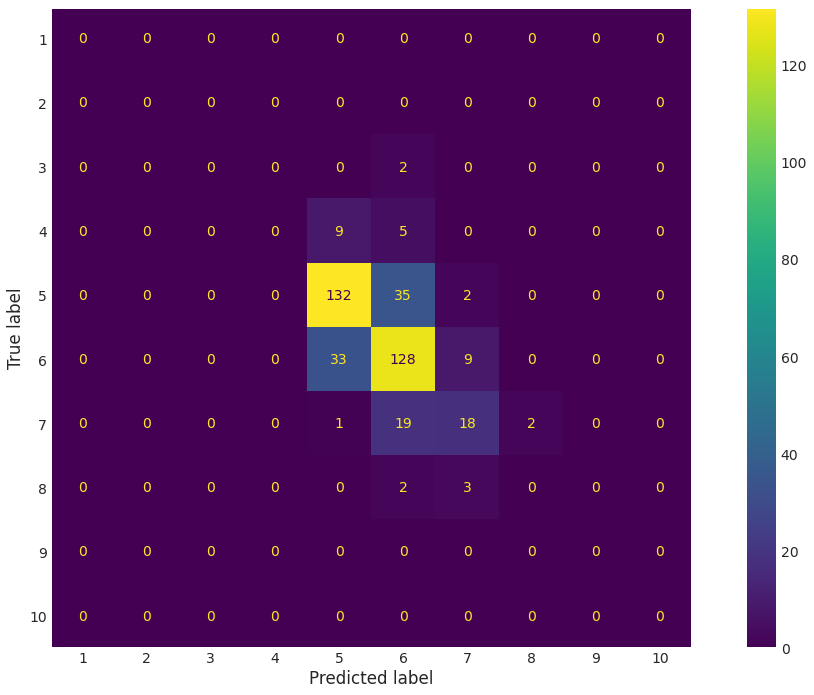

In [78]:
cm = confusion_matrix(ytest, ypred_etsr_round, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Random Forest Regressor Prediction

In [79]:
ypred_rfr = rfr.predict(test)
ypred_rfr

array([5.47 , 4.665, 6.92 , 5.015, 5.165, 5.795, 5.3  , 6.03 , 4.68 ,
       5.25 , 5.055, 5.26 , 5.75 , 5.   , 5.72 , 6.35 , 6.845, 5.275,
       5.465, 5.115, 5.74 , 5.395, 5.855, 5.835, 5.41 , 5.265, 5.42 ,
       6.76 , 5.   , 6.285, 5.765, 5.81 , 5.705, 5.445, 6.55 , 6.725,
       5.35 , 5.335, 6.22 , 5.86 , 5.245, 6.305, 6.525, 6.38 , 5.865,
       5.165, 5.235, 5.8  , 5.69 , 6.03 , 5.185, 5.375, 5.9  , 6.135,
       5.58 , 5.33 , 5.045, 5.16 , 6.85 , 5.415, 5.285, 5.69 , 5.88 ,
       6.05 , 5.2  , 6.165, 5.06 , 5.105, 6.51 , 6.08 , 5.6  , 5.435,
       4.885, 5.44 , 5.78 , 5.925, 5.675, 5.1  , 5.335, 6.68 , 5.73 ,
       5.325, 6.01 , 5.92 , 5.69 , 5.535, 5.56 , 5.035, 5.39 , 5.015,
       5.045, 5.665, 5.855, 5.35 , 6.035, 5.6  , 6.34 , 4.825, 5.49 ,
       5.575, 6.825, 6.25 , 5.855, 5.945, 5.485, 5.2  , 5.485, 5.4  ,
       5.98 , 5.155, 5.965, 5.34 , 7.305, 5.175, 5.58 , 5.79 , 5.68 ,
       6.44 , 6.005, 5.855, 5.305, 5.74 , 5.25 , 5.07 , 6.46 , 6.715,
       5.08 , 5.18 ,

In [80]:
mae_error = mean_absolute_error(ytest, ypred_rfr)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.4462


In [81]:
corr = np.corrcoef(ytest, ypred_rfr)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.6415074461220583


In [82]:
scoring.loc['RFR', ['mae_test', 'corr_test']] = [mae_error, corr]

In [83]:
ypred_rfr_round = ypred_rfr.round().astype(int)
print(ypred_rfr_round)

[5 5 7 5 5 6 5 6 5 5 5 5 6 5 6 6 7 5 5 5 6 5 6 6 5 5 5 7 5 6 6 6 6 5 7 7 5
 5 6 6 5 6 7 6 6 5 5 6 6 6 5 5 6 6 6 5 5 5 7 5 5 6 6 6 5 6 5 5 7 6 6 5 5 5
 6 6 6 5 5 7 6 5 6 6 6 6 6 5 5 5 5 6 6 5 6 6 6 5 5 6 7 6 6 6 5 5 5 5 6 5 6
 5 7 5 6 6 6 6 6 6 5 6 5 5 6 7 5 5 6 7 5 5 6 6 6 5 6 5 6 5 6 5 5 5 5 6 7 6
 5 5 6 6 5 5 5 6 6 5 6 6 6 6 7 5 5 5 6 6 6 6 6 5 5 7 5 6 6 7 6 5 5 7 6 6 6
 5 6 6 5 6 6 6 6 5 5 5 5 5 6 5 5 6 6 6 5 5 5 7 6 6 6 6 5 7 5 6 6 6 6 5 5 6
 6 5 6 6 6 6 6 6 5 6 5 5 6 6 6 7 7 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 7 6 7 5 6 5 5 5 5 6 6 5 5 5 6 6 6 6 6 6 6 5 6 5 6 6 5 5 5 7 6 5 5 6 6 5 6
 5 6 5 5 6 5 6 6 6 6 6 5 5 5 6 6 5 5 5 6 6 6 5 6 5 5 7 6 5 5 7 5 5 5 7 5 5
 6 5 6 7 5 6 6 5 5 5 6 6 6 6 5 6 7 6 6 6 5 7 4 6 5 6 6 5 6 5 6 6 6 5 7 5 5
 6 6 5 6 5 5 6 6 6 6 6 6 5 6 5 6 6 5 6 6 7 5 5 7 5 6 5 6 6 5]


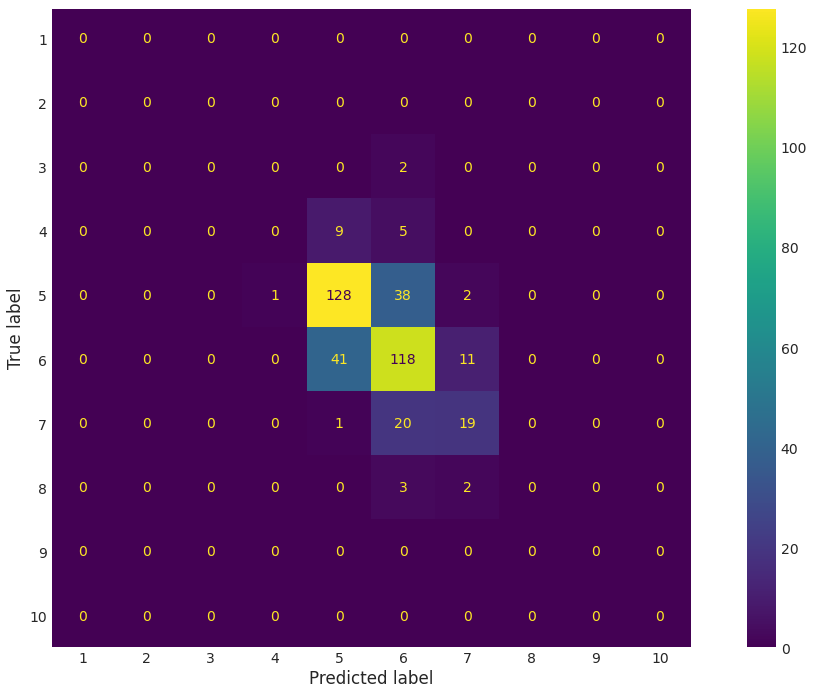

In [84]:
cm = confusion_matrix(ytest, ypred_rfr_round, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Extra Trees Classification Prediction

In [85]:
ypred_etsc = etsc.predict(test)
ypred_etsc

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 7, 7, 5, 5, 6, 6, 5, 6, 7, 7,
       6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 6, 5, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6, 6,
       5, 7, 5, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 5, 7, 5, 5, 5, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [86]:
mae_error = mean_absolute_error(ytest, ypred_etsc)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.3775


In [87]:
corr = np.corrcoef(ytest, ypred_etsc)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.5630131761173239


In [88]:
scoring.loc['ETSC', ['mae_test', 'corr_test']] = [mae_error, corr]

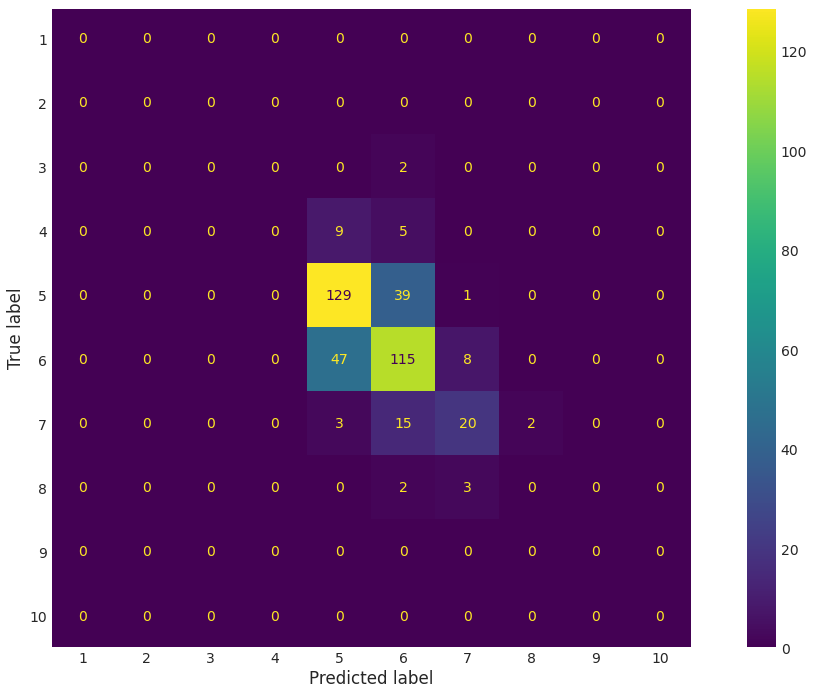

In [89]:
cm = confusion_matrix(ytest, ypred_etsc, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Random Forest Classification Prediction

In [90]:
ypred_rfc = rfc.predict(test)
ypred_rfc

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 7, 7, 5, 5, 6, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6,
       5, 7, 6, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [91]:
mae_error = mean_absolute_error(ytest, ypred_rfc)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.3775


In [92]:
corr = np.corrcoef(ytest, ypred_rfc)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.5829755955259697


In [93]:
scoring.loc['RFC', ['mae_test', 'corr_test']] = [mae_error, corr]

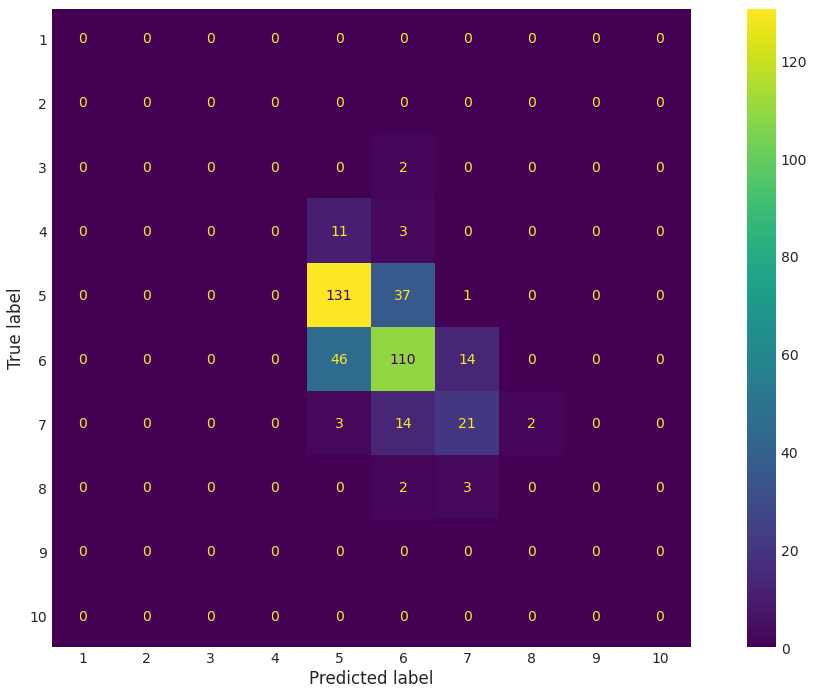

In [94]:
cm = confusion_matrix(ytest, ypred_rfc, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Extra Tree Regression 

In [95]:
ypred_etr = etr.predict(test)
ypred_etr

array([6., 5., 6., 5., 6., 5., 5., 6., 5., 5., 5., 6., 6., 4., 6., 6., 6.,
       6., 6., 6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 7., 6., 6., 6., 5.,
       6., 6., 5., 5., 6., 6., 5., 6., 7., 6., 6., 5., 5., 6., 6., 6., 5.,
       5., 6., 6., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6.,
       6., 6., 6., 5., 5., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6.,
       6., 6., 5., 5., 5., 5., 5., 6., 5., 6., 6., 6., 5., 5., 5., 6., 6.,
       6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 5., 6., 6.,
       6., 5., 6., 5., 5., 6., 6., 5., 4., 6., 6., 5., 5., 6., 6., 6., 5.,
       6., 5., 6., 5., 6., 5., 5., 5., 5., 6., 6., 6., 6., 5., 6., 6., 5.,
       6., 5., 6., 4., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6.,
       6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 7., 6., 6., 7., 5., 5.,
       6., 5., 6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 5., 5.,
       6., 5., 5., 6., 6., 5., 6., 7., 5., 7., 5., 5., 5., 6., 6., 5., 5.,
       6., 6., 5., 5., 6.

In [96]:
mae_error = mean_absolute_error(ytest, ypred_etr)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.465


In [97]:
corr = np.corrcoef(ytest, ypred_etr)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.433572728781256


In [98]:
scoring.loc['ETR', ['mae_test', 'corr_test']] = [mae_error, corr]

In [99]:
ypred_etr_round = ypred_etr.round().astype(int)
print(ypred_etr_round)

[6 5 6 5 6 5 5 6 5 5 5 6 6 4 6 6 6 6 6 6 6 5 6 5 5 5 5 6 5 7 6 6 6 5 6 6 5
 5 6 6 5 6 7 6 6 5 5 6 6 6 5 5 6 6 5 6 5 5 6 5 5 6 6 6 5 6 6 6 6 6 6 5 5 6
 6 6 5 5 6 6 6 5 6 6 6 6 6 5 5 5 5 5 6 5 6 6 6 5 5 5 6 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 5 5 6 6 6 5 6 5 5 6 6 5 4 6 6 5 5 6 6 6 5 6 5 6 5 6 5 5 5 5 6 6 6
 6 5 6 6 5 6 5 6 4 5 6 6 6 6 6 5 6 5 6 6 6 6 6 5 6 6 6 6 6 6 6 5 5 7 6 6 7
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 6 5 5 6 6 5 6 7 5 7 5 5 5 6 6 5 5 6
 6 5 5 6 6 6 5 5 5 6 5 6 6 6 6 6 6 6 5 6 5 5 6 5 5 6 5 6 5 6 5 6 5 5 5 5 5
 7 5 7 5 6 5 5 6 5 5 6 5 5 6 6 7 6 6 5 7 6 5 6 5 6 6 5 6 5 6 5 6 5 6 5 5 6
 6 6 5 5 6 5 5 6 6 6 6 5 5 5 6 6 5 5 5 6 6 6 5 6 5 4 6 6 6 4 6 5 4 5 6 5 5
 6 5 6 6 5 6 5 5 5 6 6 6 6 5 5 5 6 6 6 5 6 6 6 6 6 6 6 5 6 5 6 6 5 5 6 5 6
 6 6 6 6 5 6 6 6 6 6 6 6 5 5 5 6 6 5 6 5 6 5 5 7 6 6 5 6 7 5]


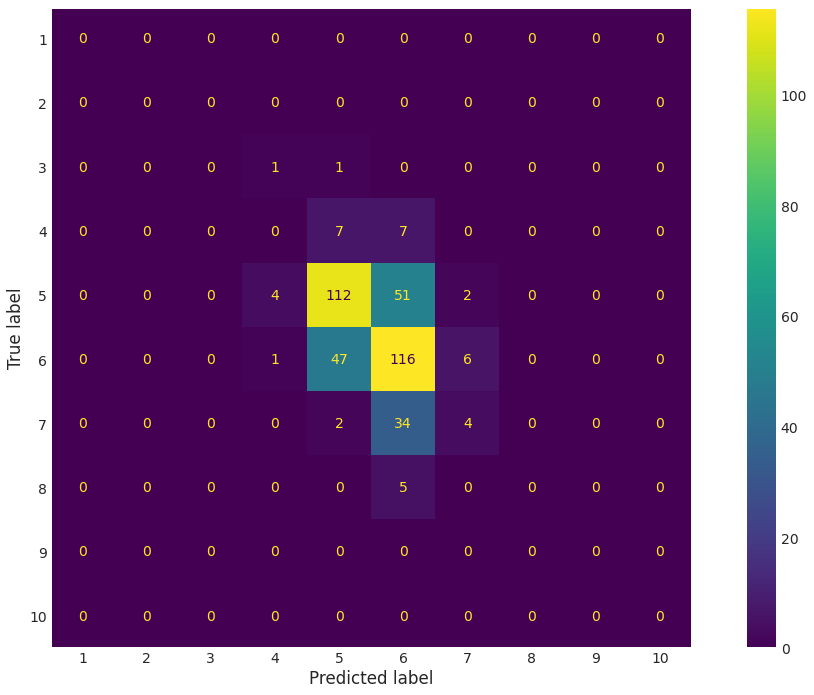

In [100]:
cm = confusion_matrix(ytest, ypred_etr_round, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Decision Tree Regression

In [101]:
ypred_dtr = dtr.predict(test)
ypred_dtr

array([6., 5., 6., 5., 6., 5., 5., 6., 5., 5., 5., 6., 6., 4., 6., 6., 6.,
       6., 6., 6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 7., 6., 6., 6., 5.,
       6., 6., 5., 5., 6., 6., 5., 6., 7., 6., 6., 5., 5., 6., 6., 6., 5.,
       5., 6., 6., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6.,
       6., 6., 6., 5., 5., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6.,
       6., 6., 5., 5., 5., 5., 5., 6., 5., 6., 6., 6., 5., 5., 5., 6., 6.,
       6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 5., 6., 6.,
       6., 5., 6., 5., 5., 6., 6., 5., 4., 6., 6., 5., 5., 6., 6., 6., 5.,
       6., 5., 6., 5., 6., 5., 5., 5., 5., 6., 6., 6., 6., 5., 6., 6., 5.,
       6., 5., 6., 4., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6.,
       6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 7., 6., 6., 7., 5., 5.,
       6., 5., 6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 5., 5.,
       6., 5., 5., 6., 6., 5., 6., 7., 5., 7., 5., 5., 5., 6., 6., 5., 5.,
       6., 6., 5., 5., 6.

In [102]:
mae_error = mean_absolute_error(ytest, ypred_dtr)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.465


In [103]:
corr = np.corrcoef(ytest, ypred_dtr)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.433572728781256


In [104]:
scoring.loc['DTR', ['mae_test', 'corr_test']] = [mae_error, corr]

In [105]:
ypred_dtr_round = ypred_dtr.round().astype(int)
ypred_dtr_round

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 7, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 4, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 4, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 7, 6, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,

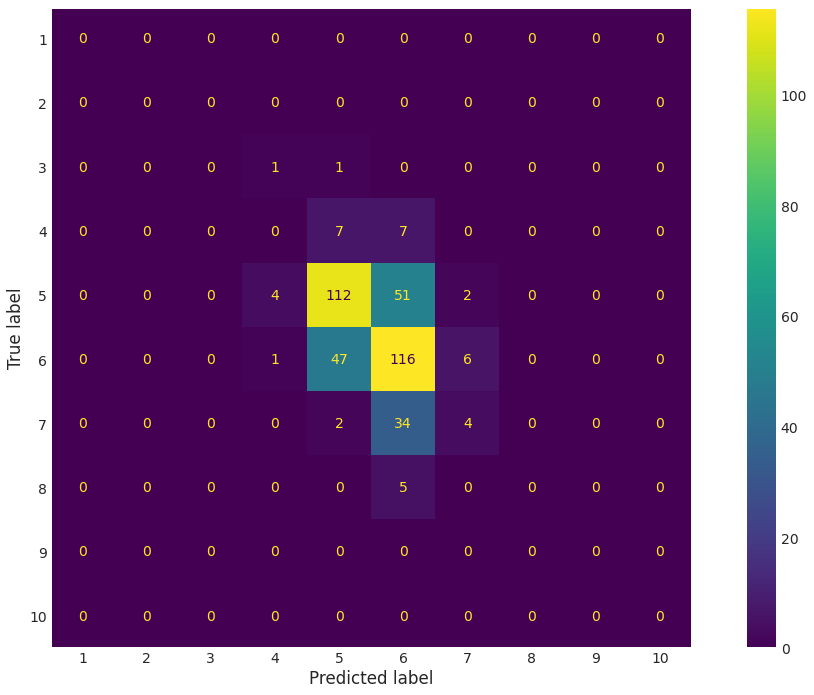

In [106]:
cm = confusion_matrix(ytest, ypred_dtr_round, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Extra Tree Classification

In [107]:
ypred_etc = etc.predict(test)
ypred_etc

array([5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 8, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 5, 3, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [108]:
mae_error = mean_absolute_error(ytest, ypred_etc)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.465


In [109]:
corr = np.corrcoef(ytest, ypred_etc)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.4135089646023159


In [110]:
scoring.loc['ETC', ['mae_test', 'corr_test']] = [mae_error, corr]

In [111]:
ypred_etc_round = ypred_etc.round().astype(int)
print(ypred_etc_round)

[5 5 6 5 5 5 5 6 5 5 5 5 6 6 6 6 7 5 6 5 6 5 5 6 5 5 5 6 5 6 5 6 6 5 6 6 5
 6 6 6 5 6 6 6 6 5 5 5 5 5 5 5 5 6 5 5 5 5 6 5 5 5 6 6 5 6 5 6 6 6 6 6 5 5
 5 6 6 5 5 6 5 5 6 6 6 5 6 5 5 5 5 5 6 5 7 6 6 5 5 6 7 6 6 6 6 5 6 6 6 5 6
 6 6 5 6 6 5 6 6 5 5 5 6 5 6 7 5 5 5 6 5 5 6 6 7 5 6 5 6 6 6 5 5 5 5 6 6 6
 6 5 6 6 6 6 5 6 5 5 6 6 6 5 6 5 6 5 6 6 5 6 5 6 5 6 5 6 6 6 5 5 5 6 5 6 8
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 6 5 5 6 6 5 6 7 6 5 5 5 6 6 5 5 5 6
 6 6 5 5 6 6 5 6 5 6 5 5 6 6 6 6 7 6 5 5 5 5 6 5 5 5 5 6 5 5 5 6 6 6 5 5 5
 5 6 8 5 5 5 5 5 5 6 5 5 6 6 6 6 6 6 5 6 6 5 6 6 6 5 5 5 5 6 6 5 3 6 5 5 6
 5 5 5 5 6 5 6 5 6 6 6 6 5 5 5 6 5 5 5 6 6 6 5 6 5 5 7 6 6 6 6 5 5 6 7 5 5
 6 5 5 7 5 6 5 5 5 5 6 6 5 6 6 6 6 6 6 5 5 6 5 6 8 6 6 5 6 5 6 5 5 6 6 5 5
 6 5 5 6 6 5 6 6 6 6 6 6 5 5 5 6 6 5 6 5 6 5 5 5 6 6 5 5 6 5]


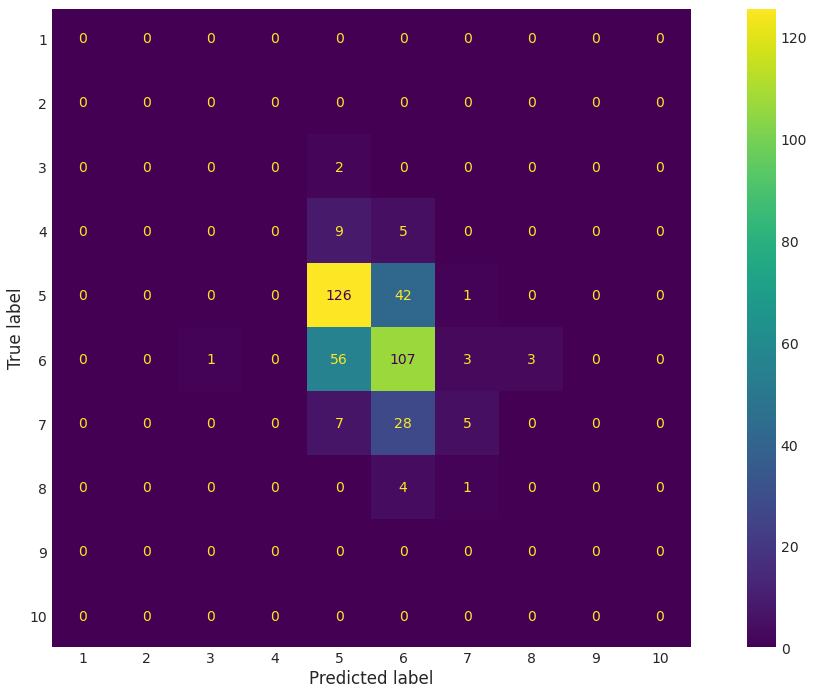

In [112]:
cm = confusion_matrix(ytest, ypred_etc, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

## Decision Tree Classification

In [113]:
ypred_dtc = dtc.predict(test)
ypred_dtc

array([5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 8, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 5, 3, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [114]:
mae_error = mean_absolute_error(ytest, ypred_dtc)
print(f'Mean Absolute Error : {mae_error}')

Mean Absolute Error : 0.465


In [115]:
corr = np.corrcoef(ytest, ypred_dtc)[0, 1]
print(f'Correlation between Predicted and Actual value : {corr}')

Correlation between Predicted and Actual value : 0.4135089646023159


In [116]:
scoring.loc['DTC', ['mae_test', 'corr_test']] = [mae_error, corr]

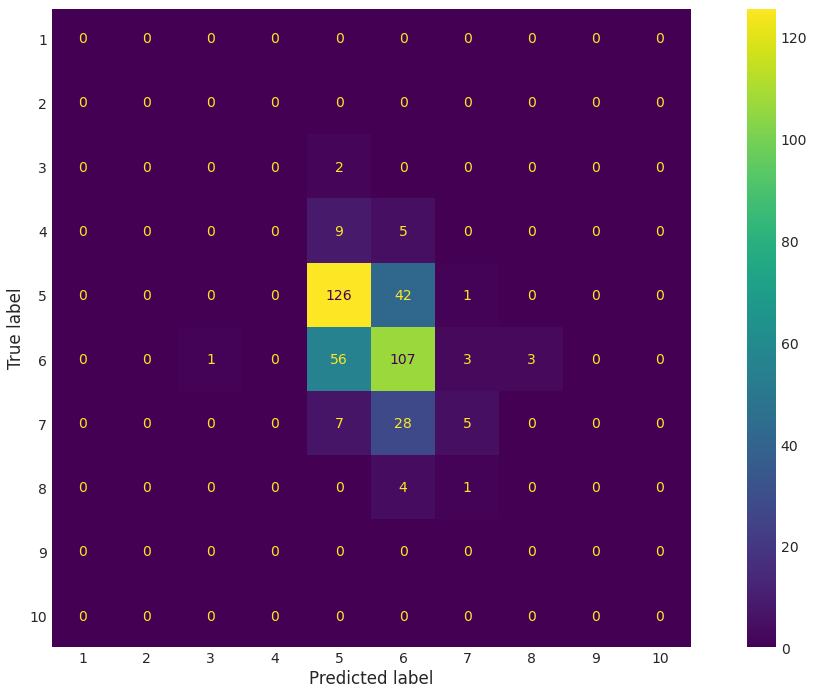

In [117]:
cm = confusion_matrix(ytest, ypred_dtc, labels = [x for x in range(1, 11)])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.xticks(list(range(10)), list(range(1, 11)))
plt.yticks(list(range(10)), list(range(1, 11)))
plt.show()

# Test Set Evaluation

In [118]:
display(scoring)

,mae_validation,corr_validation,mae_test,corr_test
ETC,0.513333,0.454676,0.465,0.413509
ETR,0.466667,0.510608,0.465,0.433573
DTC,0.513333,0.454676,0.465,0.413509
DTR,0.466667,0.510608,0.465,0.433573
ETSC,0.316667,0.67699,0.3775,0.563013
ETSR,0.36813,0.753718,0.419602,0.651367
RFC,0.33,0.672127,0.3775,0.582976
RFR,0.401017,0.750437,0.4462,0.641507


In [119]:
scoring.sort_values('corr_validation', ascending = False)

,mae_validation,corr_validation,mae_test,corr_test
ETSR,0.36813,0.753718,0.419602,0.651367
RFR,0.401017,0.750437,0.4462,0.641507
ETSC,0.316667,0.67699,0.3775,0.563013
RFC,0.33,0.672127,0.3775,0.582976
ETR,0.466667,0.510608,0.465,0.433573
DTR,0.466667,0.510608,0.465,0.433573
ETC,0.513333,0.454676,0.465,0.413509
DTC,0.513333,0.454676,0.465,0.413509


In [120]:
scoring['mae_mean'] = scoring[['mae_validation', 'mae_test']].mean(axis = 1)
scoring['corr_mean'] = scoring[['corr_validation', 'corr_test']].mean(axis = 1)

In [121]:
display(scoring.sort_values('mae_mean', ascending = True))

,mae_validation,corr_validation,mae_test,corr_test,mae_mean,corr_mean
ETSC,0.316667,0.67699,0.3775,0.563013,0.347083,0.620002
RFC,0.33,0.672127,0.3775,0.582976,0.353750,0.627551
ETSR,0.36813,0.753718,0.419602,0.651367,0.393866,0.702542
RFR,0.401017,0.750437,0.4462,0.641507,0.423608,0.695972
ETR,0.466667,0.510608,0.465,0.433573,0.465833,0.472091
DTR,0.466667,0.510608,0.465,0.433573,0.465833,0.472091
ETC,0.513333,0.454676,0.465,0.413509,0.489167,0.434092
DTC,0.513333,0.454676,0.465,0.413509,0.489167,0.434092


In [122]:
display(scoring.sort_values('corr_mean', ascending = False))

,mae_validation,corr_validation,mae_test,corr_test,mae_mean,corr_mean
ETSR,0.36813,0.753718,0.419602,0.651367,0.393866,0.702542
RFR,0.401017,0.750437,0.4462,0.641507,0.423608,0.695972
RFC,0.33,0.672127,0.3775,0.582976,0.353750,0.627551
ETSC,0.316667,0.67699,0.3775,0.563013,0.347083,0.620002
ETR,0.466667,0.510608,0.465,0.433573,0.465833,0.472091
DTR,0.466667,0.510608,0.465,0.433573,0.465833,0.472091
ETC,0.513333,0.454676,0.465,0.413509,0.489167,0.434092
DTC,0.513333,0.454676,0.465,0.413509,0.489167,0.434092


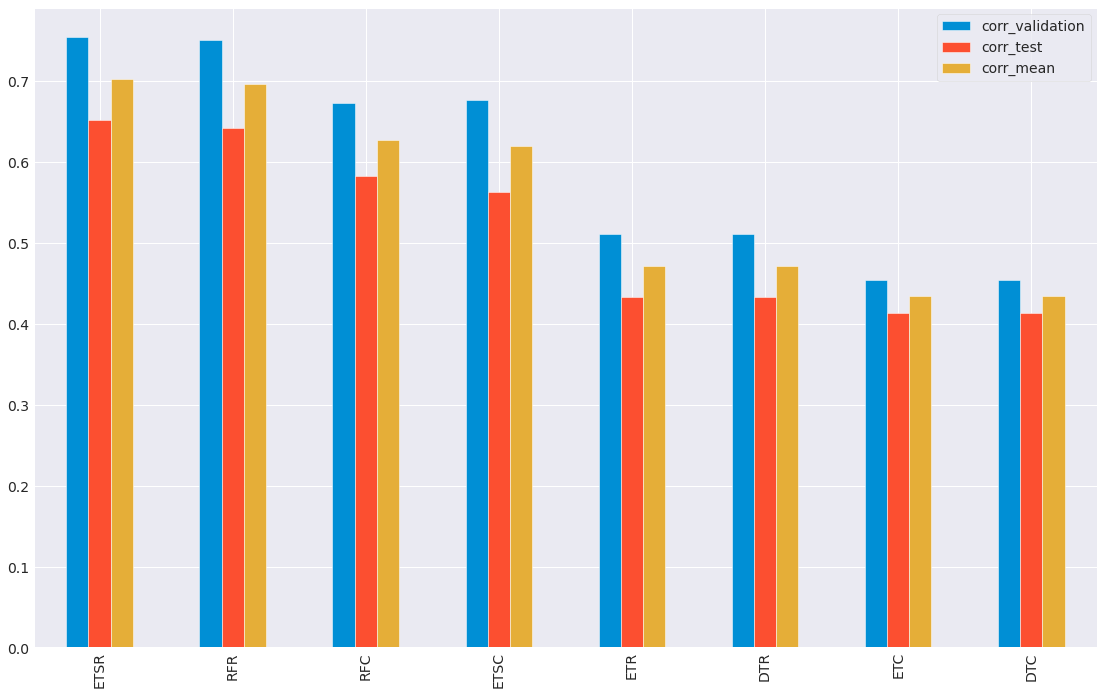

In [123]:
scoring[['corr_validation', 'corr_test', 'corr_mean']].sort_values('corr_mean', ascending = False).plot.bar()

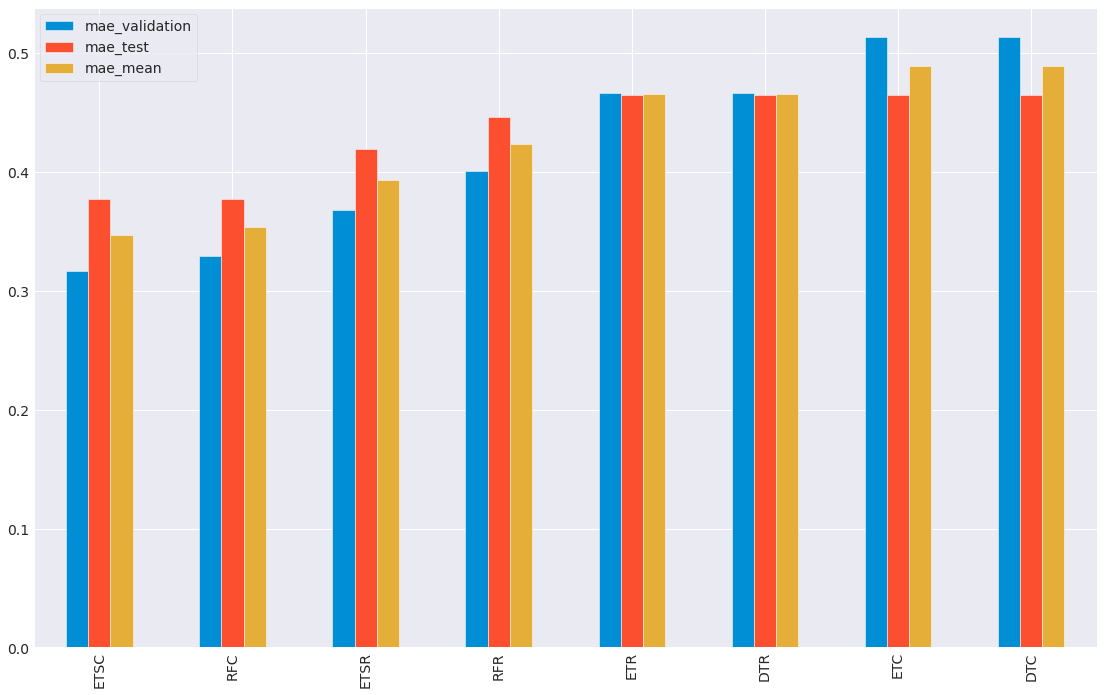

In [124]:
scoring[['mae_validation', 'mae_test', 'mae_mean']].sort_values('mae_mean', ascending = True).plot.bar()

# Seeing through the model
We want to know how the model decides each variable as its priority / to get  the result. <br>
There are 8 models, we'll use the top 3 to see the result.

## According to Extra Trees Regressor

In [125]:
perm_etsr = PermutationImportance(etsr, random_state = 0).fit(xval, yval)
eli5.show_weights(perm_etsr, feature_names = xval.columns.tolist())

Weight,Feature
0.4007 ± 0.0553,alcohol
0.1522 ± 0.0472,volatile acidity
0.1280 ± 0.0143,sulphates
0.0401 ± 0.0136,total sulfur dioxide
0.0267 ± 0.0100,citric acid
0.0146 ± 0.0058,density
0.0112 ± 0.0085,residual sugar
0.0107 ± 0.0148,free sulfur dioxide
0.0102 ± 0.0073,chlorides
0.0090 ± 0.0111,fixed acidity


In [126]:
etsr_feature_importance = pd.Series(
    etsr.feature_importances_,
    index = xval.columns.tolist()
).sort_values(ascending = False)
etsr_feature_importance

alcohol                 0.246018
volatile acidity        0.148107
sulphates               0.105289
citric acid             0.071798
total sulfur dioxide    0.069863
chlorides               0.063795
residual sugar          0.062445
free sulfur dioxide     0.059810
fixed acidity           0.058127
pH                      0.057664
density                 0.057084
dtype: float64

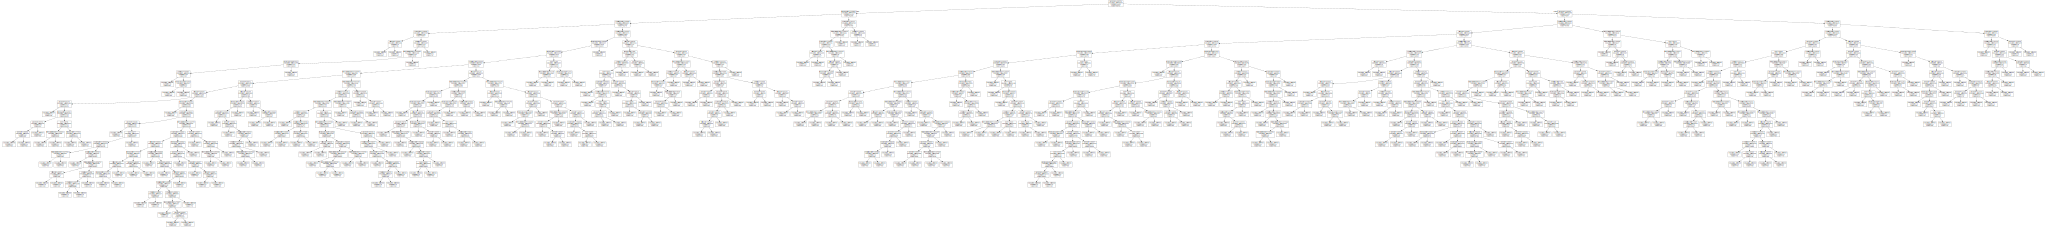

In [127]:
plt.rcParams['figure.figsize'] = (9, 9)
from sklearn import tree
from sklearn.tree import _tree
import graphviz

tree_etsr = tree.export_graphviz(etsr.estimators_[0], out_file = None, feature_names = xval.columns.tolist())
graphviz.Source(tree_etsr)

In [128]:
#for i in range(10) :
#    path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Trees/Extra Tree - {i}'
#    tree.export_graphviz(etsr.estimators_[i], out_file = path + '.dot', feature_names = xval.columns.tolist())
#    (graph, ) = pydot.graph_from_dot_file(path + '.dot')
#    graph.write_png(path + '.png')
#    os.remove(path + '.dot')

In [129]:
print(tree.export_text(etsr.estimators_[0], feature_names = xval.columns.tolist(), max_depth = 15))

|--- alcohol <= 10.08
|   |--- fixed acidity <= 11.85
|   |   |--- volatile acidity <= 0.29
|   |   |   |--- sulphates <= 0.50
|   |   |   |   |--- citric acid <= 0.26
|   |   |   |   |   |--- value: [5.00]
|   |   |   |   |--- citric acid >  0.26
|   |   |   |   |   |--- value: [4.00]
|   |   |   |--- sulphates >  0.50
|   |   |   |   |--- chlorides <= 0.27
|   |   |   |   |   |--- free sulfur dioxide <= 22.30
|   |   |   |   |   |   |--- residual sugar <= 9.32
|   |   |   |   |   |   |   |--- chlorides <= 0.09
|   |   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |   |   |--- chlorides >  0.09
|   |   |   |   |   |   |   |   |--- residual sugar <= 2.40
|   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |--- residual sugar >  2.40
|   |   |   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |   |--- residual sugar >  9.32
|   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |--- free sulfur dioxide >  22.

In [130]:
print(tree.export_text(etsr.estimators_[1], feature_names = xval.columns.tolist(), spacing = 2))

|-- volatile acidity <= 0.63
|  |-- alcohol <= 11.78
|  |  |-- alcohol <= 11.18
|  |  |  |-- alcohol <= 10.63
|  |  |  |  |-- total sulfur dioxide <= 30.04
|  |  |  |  |  |-- volatile acidity <= 0.61
|  |  |  |  |  |  |-- free sulfur dioxide <= 9.50
|  |  |  |  |  |  |  |-- sulphates <= 0.51
|  |  |  |  |  |  |  |  |-- citric acid <= 0.26
|  |  |  |  |  |  |  |  |  |-- total sulfur dioxide <= 20.27
|  |  |  |  |  |  |  |  |  |  |-- value: [5.00]
|  |  |  |  |  |  |  |  |  |-- total sulfur dioxide >  20.27
|  |  |  |  |  |  |  |  |  |  |-- value: [6.00]
|  |  |  |  |  |  |  |  |-- citric acid >  0.26
|  |  |  |  |  |  |  |  |  |-- value: [5.00]
|  |  |  |  |  |  |  |-- sulphates >  0.51
|  |  |  |  |  |  |  |  |-- sulphates <= 0.73
|  |  |  |  |  |  |  |  |  |-- density <= 1.00
|  |  |  |  |  |  |  |  |  |  |-- pH <= 3.25
|  |  |  |  |  |  |  |  |  |  |  |-- truncated branch of depth 9
|  |  |  |  |  |  |  |  |  |  |-- pH >  3.25
|  |  |  |  |  |  |  |  |  |  |  |-- truncated branch of 

In [131]:
for i in range(10) :
    text = tree.export_text(etsr.estimators_[i], feature_names = xval.columns.tolist(), max_depth = 20, spacing = 3)
    with open(f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Trees/Extra Tree - {i}.txt', 'w') as f :
        f.write(text)
    print(f'Extra Tree {i} Completed')

Extra Tree 0 Completed
Extra Tree 1 Completed
Extra Tree 2 Completed
Extra Tree 3 Completed
Extra Tree 4 Completed
Extra Tree 5 Completed
Extra Tree 6 Completed
Extra Tree 7 Completed
Extra Tree 8 Completed
Extra Tree 9 Completed


In [132]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [133]:
rules = get_rules(etsr.estimators_[0], xval.columns.tolist(), None)
for rule in rules:
  print(rule)

if (alcohol > 10.078) and (alcohol > 11.528) and (volatile acidity <= 0.631) and (volatile acidity > 0.397) and (citric acid <= 0.455) and (density > 0.993) and (alcohol <= 12.572) and (total sulfur dioxide > 13.929) and (fixed acidity <= 9.377) and (pH <= 3.642) then response: 6.0 | based on 17 samples
if (alcohol <= 10.078) and (fixed acidity <= 11.854) and (volatile acidity > 0.288) and (volatile acidity <= 0.704) and (residual sugar <= 15.289) and (fixed acidity <= 11.154) and (volatile acidity <= 0.598) and (free sulfur dioxide > 20.948) and (total sulfur dioxide > 97.735) and (chlorides <= 0.098) then response: 5.0 | based on 17 samples
if (alcohol <= 10.078) and (fixed acidity <= 11.854) and (volatile acidity > 0.288) and (volatile acidity > 0.704) and (citric acid > 0.049) and (alcohol <= 9.578) and (free sulfur dioxide > 17.343) and (citric acid <= 0.649) then response: 5.0 | based on 13 samples
if (alcohol <= 10.078) and (fixed acidity <= 11.854) and (volatile acidity > 0.288

## According to Random Forest Regressor

In [134]:
perm_rfr = PermutationImportance(rfr, random_state = 0).fit(xval, yval)
eli5.show_weights(perm_rfr, feature_names = xval.columns.tolist())

Weight,Feature
0.3634 ± 0.0627,alcohol
0.1881 ± 0.0232,sulphates
0.1527 ± 0.0595,volatile acidity
0.0585 ± 0.0107,total sulfur dioxide
0.0213 ± 0.0128,chlorides
0.0182 ± 0.0115,citric acid
0.0176 ± 0.0085,residual sugar
0.0165 ± 0.0067,density
0.0159 ± 0.0191,free sulfur dioxide
0.0088 ± 0.0113,fixed acidity


In [135]:
rfr_feature_importance = pd.Series(
    rfr.feature_importances_,
    index = xval.columns.tolist()
).sort_values(ascending = False)
rfr_feature_importance

alcohol                 0.263529
volatile acidity        0.156994
sulphates               0.115243
total sulfur dioxide    0.076008
chlorides               0.069693
residual sugar          0.055867
citric acid             0.053976
pH                      0.053608
fixed acidity           0.053533
density                 0.051301
free sulfur dioxide     0.050247
dtype: float64

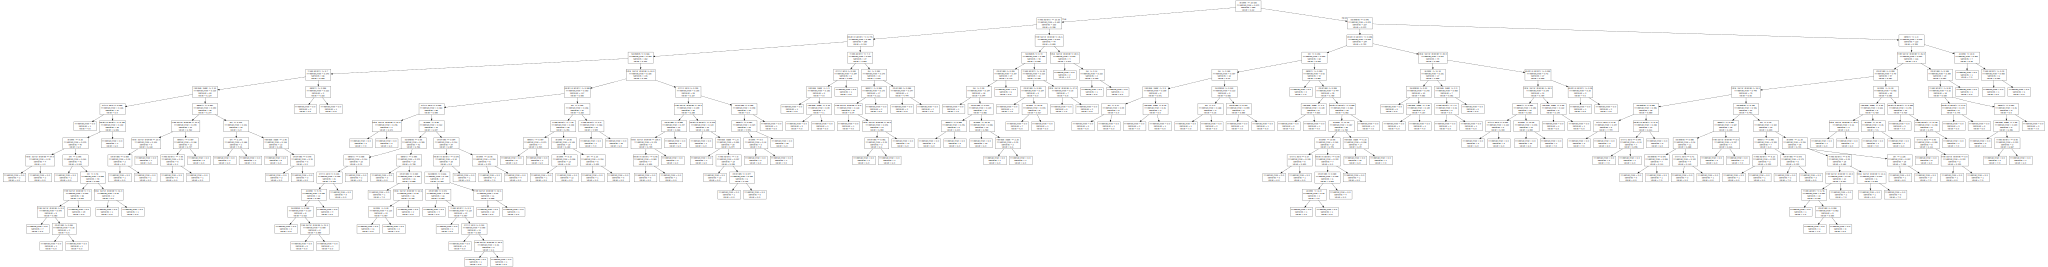

In [136]:
plt.rcParams['figure.figsize'] = (9, 9)
from sklearn import tree
import graphviz

tree_rfr = tree.export_graphviz(rfr.estimators_[1], out_file = None, feature_names = xval.columns.tolist())
graphviz.Source(tree_rfr)

In [137]:
for i in range(10) :
    path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Trees/Random Forest - {i}.txt'
    text = tree.export_text(rfr.estimators_[i], feature_names = xval.columns.tolist(), max_depth = 15)
    with open(path, 'w') as f :
        f.write(text)
    print(f'Random Forest {i} Completed')

Random Forest 0 Completed
Random Forest 1 Completed
Random Forest 2 Completed
Random Forest 3 Completed
Random Forest 4 Completed
Random Forest 5 Completed
Random Forest 6 Completed
Random Forest 7 Completed
Random Forest 8 Completed
Random Forest 9 Completed


## According to Extra Tree Regressor

In [138]:
perm_etr = PermutationImportance(etr, random_state = 0).fit(xval, yval)
eli5.show_weights(perm_etr, feature_names = xval.columns.tolist())

Weight,Feature
0.5243 ± 0.1287,alcohol
0.1647 ± 0.1069,volatile acidity
0.0884 ± 0.0281,density
0.0623 ± 0.0274,total sulfur dioxide
0.0271 ± 0.0835,fixed acidity
0.0261 ± 0.0494,citric acid
0.0171 ± 0.0207,sulphates
0.0161 ± 0.0356,free sulfur dioxide
0.0080 ± 0.0049,residual sugar
0.0030 ± 0.0136,pH


In [139]:
etr_feature_importance = pd.Series(
    etr.feature_importances_,
    index = xval.columns.tolist()
).sort_values(ascending = False)
etr_feature_importance

alcohol                 0.640927
volatile acidity        0.092664
fixed acidity           0.084942
total sulfur dioxide    0.061776
density                 0.030888
citric acid             0.027027
sulphates               0.027027
free sulfur dioxide     0.015444
residual sugar          0.007722
chlorides               0.007722
pH                      0.003861
dtype: float64

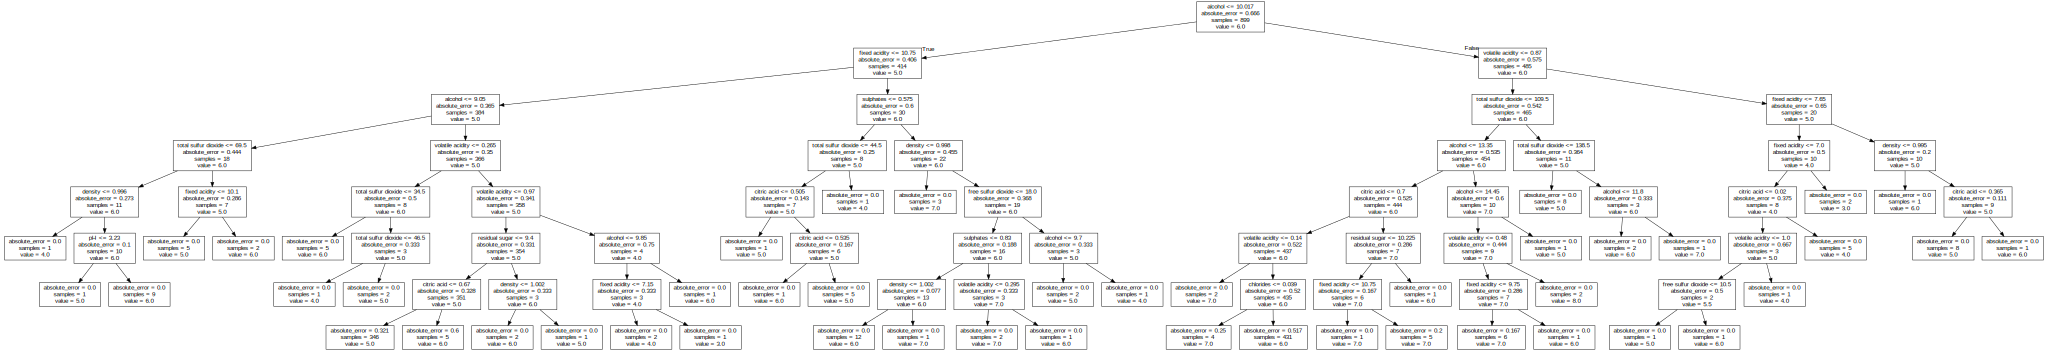

In [140]:
plt.rcParams['figure.figsize'] = (9, 9)
from sklearn import tree
import graphviz

tree_etr = tree.export_graphviz(etr, out_file = None, feature_names = xval.columns.tolist())
graphviz.Source(tree_etr)

In [141]:
path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Trees/Extra Tree.txt'
text = tree.export_text(etr, feature_names = xval.columns.tolist(), max_depth = 15)
with open(path, 'w') as f :
    f.write(text)

# Pruning the Tree

# Conclusion

After we're looking through 8 different models, we can see that by using the Extra Trees Regressor, we get the best score overall. Lowest MAE and highest correlation. But this is still the baseline, we still haven't explored any other technique that we can use to get the best score and correlation between our predicted values and actual values. This is intentionally made just like this so we can take our step one-by-one.

# Saving model into file

In [ ]:
import joblib

Best candidate model : <br>
Extra Trees Regressor <br>
Random Forest Regressor <br>
Extra Tree Regressor

In [ ]:
path = '/content/drive/MyDrive/ML Project /Red Wine Quality/Model/'
joblib.dump(etr, f'{path}extra_tree.sav')
joblib.dump(rfr, f'{path}random_forest.sav')
joblib.dump(etsr, f'{path}extra_trees.sav')

['/content/drive/MyDrive/ML Project /Red Wine Quality/Model/extra_trees.sav']